# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 8. Оценки параметров.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком
    * *или* вставив ее в ноутбук посредством `Edit -> Insert Image` при редактировании markdown-ячейки (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). **<font color="red">Неправильно вставленные фотографии могут не передаться при отправке.</font>** Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.


**Баллы за задание:**

* Задача 1 &mdash; 60 баллов
* Задача 2 &mdash; 20 баллов
* Задача 3 &mdash; 30 баллов
* Задача 4 &mdash; 50 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [1]:
# Bot check

# HW_ID: fpmi_ad8
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid', font_scale=1.2, palette='Set2')

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/estimators.html">ноутбук</a> с занятия по оценкам параметров.


---
### Задача 1.

Найдите оценку параметра $\theta$ методом моментов по выборке размера $n$ из распределения:
* $U(a, b), \theta=(a, b)$; 
* $Pois(\theta)$;
* $\mathcal{N}(a, \sigma^2), \theta=(a, \sigma)$.

Выводить характеристики вероятностных распределений (мат. ожидание, дисперсия) не требуется.

1) Пусть n - размер выборки

$x_1, x_2, ... , x_n \sim U(\widehat{a}, \widehat{b})$, характеристики распределения:
$\; \mathbb{E}X = \frac{\widehat{a} + \widehat{b}}{2}, \;\; \mathbb{E}X^2 = \frac{\widehat{a}^2 + \widehat{a}\widehat{b} + \widehat{b}^2}{3}$. Значит:

Положим $\widehat{b} > \widehat{a}$.

\begin{equation*}
 \begin{cases}
   \overline X = \frac{\widehat{a} + \widehat{b}}{2}, 
   \\
   \overline{X^2} = \frac{\widehat{a}^2 + \widehat{a}\widehat{b} + \widehat{b}^2}{3}
 \end{cases}
\end{equation*}

\begin{equation*}
 \begin{cases}
    \widehat{a} + \widehat{b} = 2 \cdot \overline X, 
   \\
   \widehat{a}^2 + \widehat{a}\widehat{b} + \widehat{b}^2 = 3 \cdot \overline{X^2}
 \end{cases}
\end{equation*}

$(\widehat{a} + \widehat{b})^2 - \widehat{a}\widehat{b} = 4 {\overline X}^2 - \widehat{a} \cdot (2 \overline X - \widehat{a}) = 3 \cdot \overline{X^2}$

$\widehat{a}^2 - 2\widehat{a} \cdot \overline X + 4 {\overline X}^2 - 3 \overline{X^2} = 0$

$D = 4 {\overline X}^2 - 4 \cdot (4 {\overline X}^2 - 3 \overline{X^2}) = 12\overline{X^2} - 12{\overline X}^2$

$$\widehat{a} = \frac{2\overline X \pm 2 \cdot \sqrt{3 \overline{X^2} - 3 {\overline X}^2}}{2} = \overline X \pm \sqrt{3 \overline{X^2} - 3 {\overline X}^2}, \; \text{так как} \; \widehat{b} > \widehat{a}, \; \text{то} \; \widehat{a} = \overline X - \sqrt{3 \overline{X^2} - 3 {\overline X}^2}$$

Тогда: $\widehat{b} = 2 \overline X - \widehat{a} = \overline X + \sqrt{3 \overline{X^2} - 3 {\overline X}^2}$

Ответ: $\widehat{\theta} = (\widehat{a}, \widehat{b}) = (\overline X - \sqrt{3 \overline{X^2} - 3 {\overline X}^2}, \overline X + \sqrt{3 \overline{X^2} - 3 {\overline X}^2})$

2) Пусть n - размер выборки

$x_1, x_2, ... , x_n \sim Pois(\widehat{\theta})$, характеристики распределения: $\; \mathbb{E}X = \widehat{\theta}$. Значит:

$\widehat{\theta} = \mathbb{E}X = \overline X$

Ответ: $\widehat{\theta} = \overline X$

3) Пусть n - размер выборки

$x_1, x_2, ... , x_n \sim \mathcal{N}(\widehat{a}, \widehat{\sigma}^2)$, характеристики распределения: 
$\; \mathbb{E}X = \widehat{a}, \;\; \mathbb{E}X^2 = \widehat{a}^2 + \widehat{\sigma}^2$. Значит:

\begin{equation*}
 \begin{cases}
    \widehat{a} = \overline X, 
   \\
   \widehat{a}^2 + \widehat{\sigma}^2 = \overline{X^2} \;\; \Rightarrow \widehat{\sigma} = \sqrt{\overline{X^2} - {\overline X}^2}
 \end{cases}
\end{equation*}

Ответ: $\widehat{\theta} = (\widehat{a}, \widehat{\sigma}) = (\overline X, \sqrt{\overline{X^2} - {\overline X}^2})$


---
### Задача 2.

Являются ли сильно состоятельными оценки, полученные в предыдущей задаче?

Для равномерного распределения *достаточно* выполнить визуальную проверку, в остальных случаях &mdash; *необходимо* привести теоретическое доказательство, используя известные вам теоретические утверждения.

**Решение:**

*Th.* Пусть x сходится почти наверное и $f(x)$ непрерывна, тогда $f(x)$ сходится почти наверное. 

По усиленному закону больших чисел:

$\overline X \xrightarrow{п. н.} \mathbb{E}X$

$\overline X^2 \xrightarrow{п. н.} \mathbb{E}X^2$

1)

Характеристики распределения:
$\; \mathbb{E}X = \frac{a + b}{2}, \;\; \mathbb{E}X^2 = \frac{a^2 + ab + b^2}{3}$

$\theta_1 = \overline X - \sqrt{3 \overline{X^2} - 3 {\overline X}^2} \xrightarrow{п. н.} \mathbb{E}X - \sqrt{3\mathbb{E}X^2 - 3(\mathbb{E}X)^2} = \frac{a + b}{2} - \sqrt{\frac{1}{4}a^2 - \frac{1}{2}ab + \frac{1}{4}b^2} = \frac{a + b}{2} - \frac{|a - b|}{2} = a, \; \text{так как} \; b > a$

  $\theta_2 = \overline X + \sqrt{3 \overline{X^2} - 3 {\overline X}^2} \xrightarrow{п. н.} \mathbb{E}X + \sqrt{3\mathbb{E}X^2 - 3(\mathbb{E}X)^2} = \frac{a + b}{2} + \sqrt{\frac{1}{4}a^2 - \frac{1}{2}ab + \frac{1}{4}b^2} = \frac{a + b}{2} + \frac{|a - b|}{2} = b, \; \text{так как} \; b > a$

Значит:

$
\theta = 
\begin{pmatrix}
    \theta_1 \\
    \theta_2
\end{pmatrix} \xrightarrow{п. н.}
\begin{pmatrix}
    a \\
    b
\end{pmatrix}
$

Значит, по утверждению с последней лекции, данная оценка является сильно состоятельной.

2) 

Характеристики распределения: $\; \mathbb{E}X = \lambda$

$\theta = \overline X \xrightarrow{п. н.} \mathbb{E}X = \lambda$

$\theta \xrightarrow{п. н.} \lambda$

Значит, по утверждению с последней лекции, данная оценка является сильно состоятельной.

3) 

Характеристики распределения: 
$\; \mathbb{E}X = a, \;\; \mathbb{E}X^2 = a^2 + \sigma^2$

$\theta_1 = \overline X \xrightarrow{п. н.} \mathbb{E}X = a$

$\theta_1 \xrightarrow{п. н.} a$

$\theta_2 = \sqrt{\overline{X^2} - {\overline X}^2} \xrightarrow{п. н.}  \sqrt{a^2 + \sigma^2 - a^2} = \sigma$

$\theta_2 \xrightarrow{п. н.} \sigma$

Значит:

$\theta = 
\begin{pmatrix}
    \theta_1 \\
    \theta_2
\end{pmatrix} \xrightarrow{п. н.}
\begin{pmatrix}
    a \\
    \sigma
\end{pmatrix}$

Значит, по утверждению с последней лекции, данная оценка является сильно состоятельной.

---
### Задача 3.   

**a).** Пусть $X_1,...,X_n$ выборка из некоторого распределения $\mathsf{P}$, причем ${\sf D} X_1=\sigma^2<+\infty$, и $\sigma$ неизвестно. 
Рассмотрим оценку $S^2 = \overline{X^2}-\overline{X}^2$ дисперсии $\sigma^2$.

Докажите, что $S^2=\frac1n\sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2$.

**b).** Оценка $\widehat{\theta}$ называется несмещенной оценкой параметра $\theta$ если для любого $\theta \in \Theta$ выполнено $\mathsf{E}_\theta \widehat{\theta} = \theta$. Иначе говоря, какое бы ни оказалось истинное значение параметра $\theta$ рассматривая оценку $\widehat{\theta}$ в среднем будем получать именно $\theta$.

Является ли статистика $S^2$ несмещенной оценкой $\sigma^2$?

*Подсказка.* Посчитайте математическое ожидание случайной величины $S^2$. Используйте для этого известные вам свойства математического ожидания.

**Решение:**

**a)**

$$\frac{1}{n}\sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2 = \frac{1}{n} \sum\limits_{i=1}^{n} X_i^2 - \frac{2}{n} \overline X \sum \limits_{i = 1}^{n} X_i + \frac{1}{n} \sum\limits_{i=1}^{n} {\overline X}^2 = \overline{X^2} - 2 \cdot {\overline X}^2 + {\overline X}^2 = \overline{X^2} - {\overline X}^2 = S^2, \; \text{что и требовалось доказать}$$

**b)**

$$\mathbb{E}[S^2] = \mathbb{E}\Big[\frac{1}{n}\sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2\Big] = \mathbb{E}\Big[\frac{1}{n}\sum\limits_{i=1}^n\left((X_i - \mu) - (\overline{X} - \mu)\right)^2\Big] = 
\mathbb{E}\Big[\frac{1}{n}\sum\limits_{i = 1}^n (X_i - \mu)^2 - \frac{2}{n} (\overline X - \mu) \cdot \sum \limits_{i = 1}^n (X_i - \mu) + \frac{1}{n}\sum\limits_{i = 1}^n (\overline X - \mu)^2 \Big] = $$

$$ = \mathbb{E}\Big[\frac{1}{n}\sum\limits_{i = 1}^n (X_i - \mu)^2 - 2(\overline X - \mu)^2 + (\overline X - \mu)^2 \Big] = \mathbb{E}\Big[\frac{1}{n}\sum\limits_{i = 1}^n (X_i - \mu)^2 - (\overline X - \mu)^2 \Big] = \mathbb{E}\Big[\frac{1}{n}\sum\limits_{i = 1}^n (X_i - \mu)^2 \Big] - \mathbb{E}\Big[(\overline X - \mu)^2 \Big]$$

$\mathbb{E}\Big[\frac{1}{n}\sum\limits_{i = 1}^n (X_i - \mu)^2 \Big] = \sigma^2$ - по определению дисперсии.

Рассмотрим теперь второе слагаемое:

$$\mathbb{E}\Big[(\overline X - \mu)^2 \Big] = \mathbb{E}\Big[(\frac{1}{n} \sum \limits_{i = 1}^n (X_i - \mu))^2 \Big] = \mathbb{E}\Big[\frac{1}{n^2} \sum \limits_{i = 1}^n (X_i - \mu)^2 + \frac{2}{n^2} \sum \limits_{i < j}^n (X_i - \mu) (X_j - \mu) \Big]$$

Учитывая, что $X_i$ и $X_j$ - независимые и $\mathbb{E} [(X_i - \mu)] = 0$, получим:

$\mathbb{E} \Big[\frac{2}{n^2} \sum \limits_{i < j}^n (X_i - \mu) (X_j - \mu) \Big] = \frac{2}{n^2} \sum \limits_{i < j}^n \mathbb{E}[(X_i - \mu)] \cdot \mathbb{E}[(X_j - \mu)] = 0$, значит:

$$\mathbb{E}\Big[(\overline X - \mu)^2 \Big] = \mathbb{E} \Big[ \frac{1}{n^2} \sum \limits_{i = 1}^n (X_i - \mu)^2 \Big] = \frac{1}{n} \sigma^2 = \frac{\sigma^2}{n}$$

В итоге получаем, что:

$\mathbb{E}[S^2] = \sigma^2 - \frac{\sigma^2}{n} = \frac{n - 1}{n} \sigma^2 < \sigma^2$, значит $S^2$ не является несмещенной оценкой $\sigma^2$.

 ---
### Задача 4.   
Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $\mathcal{N}(0, \sigma^2)$. В качестве оценок $\sigma^2$ обычно используют $S^2$ или $\frac{n}{n-1}S^2$. Что можно сказать про их несмещенность?

**Ответ:** В предыдущем номере мы вывели, что $S^2 = \frac{n - 1}{n} \sigma^2$. Значит $S^2$ - смещенная оценка, а $\frac{n}{n-1} S^2$ - несмещенная.

**1.** Теперь проверьте это на практике. Для каждой из приведенных выше оценок $\widehat{\theta}$ выполните следующие действия.

* Вычислите $k = 500$ независимых оценок $\widehat{\theta}_1, ... , \widehat{\theta}_k$ по независимым выборкам $(X_1^1, ... , X_n^1), ... , (X_1^k, ... , X_n^k)$, сгенерированным из распределения $\mathcal{N}(0, \sigma^2)$. Для генерации выберите какое-то истинное значение $\sigma$. Далее вычислите среднее этих оценок, которое обозначим $\widetilde{\theta}$.

* Визуализируйте полученные значения, построив на **одном** графике точки $(\widehat{\theta}_1, $y$), ... , (\widehat{\theta}_k, y)$ и среднее оценок $(\widetilde{\theta}, y)$, где $y$ &mdash; произвольные различные (например, 0 и 1) координаты для двух различных типов оценок.

* Повторите действие три раза для $n \in \{10, 100, 500\}$. В итоге получится три графика для различных $n$, на каждом из которых изображено поведение двух типов оценок и их среднее.

Используйте приведенный ниже **шаблон** для визуализации значений.

**Внимание!** Следите за информативностью и наглядностью графиков. Например, пустых пространств должно быть как можно меньше, ничего не должно быть скомкано, вся нужная информация должна быть представлена. Посмотрите <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/lecture2_2.pdf">презентацию</a> по оформлению домашних заданий. **Если график чему-то не удовлетворяет, оценка будет снижена.**

Вместо использования `matplotlib` можно также строить графики с помощью `plotly`, отправляя также html-версию графика.

**Решение:**

Посчитаем по 500 оценок для каждого размера выборки:

In [63]:
k = 500
arr_theta = []
arr_theta_dis = []
for n in [10, 100, 500]:
    tmp1 = []
    tmp2 = []
    selection = np.random.normal(0, 1, 500 * n)
    selection = selection.reshape(500, n)
    selection_2 = selection**2
    tmp1 = (selection_2.mean(axis=1) - selection.mean(axis=1)**2)
    tmp2 = n / (n - 1) * (selection_2.mean(axis=1) - selection.mean(axis=1)**2)
    arr_theta.append(tmp1)
    arr_theta_dis.append(tmp2)

Используем функцию, которая была изначально дана, с минимальными доработками:

In [74]:
def draw(l, n):
    # Вначале:
    plt.figure(figsize=(12, 2))
    y = 200
    # Для каждой оценки:
    # y - номер оценки
    plt.scatter(arr_theta[l], np.zeros(500) + y - 20, 
        alpha=0.1, s=100, color='green', label=r'$S^2$')
    plt.scatter(arr_theta_dis[l], np.zeros(500) + 20, 
        alpha=0.1, s=100, color='blue', label=r'$\frac{n}{n - 1}S^2$')
    plt.scatter(arr_theta[l].mean(), y - 20, marker='*', s=200, 
        color='w', edgecolors='black')
    plt.scatter(arr_theta_dis[l].mean(), 20, marker='*', s=200, 
        color='w', edgecolors='black')
    # Для всего графика:
    plt.vlines(1, 1, 200, color='r')
    plt.title(f'Размер выборки = {n}')
    plt.xlim((0.8, 1.2))
    plt.yticks([])
    plt.legend()
    None

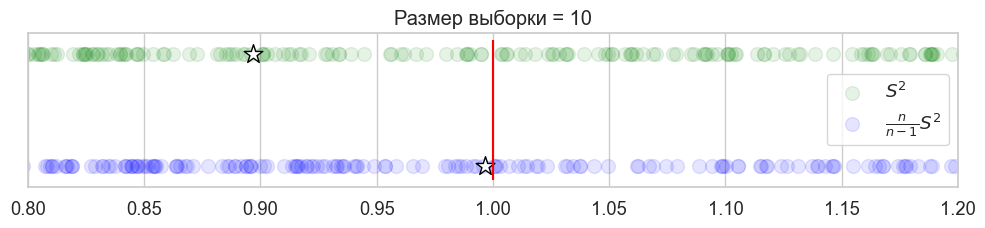

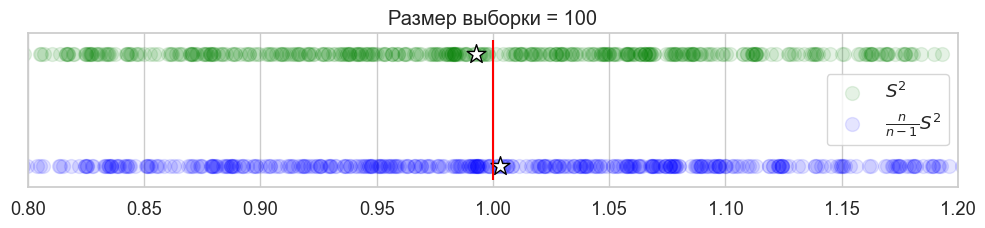

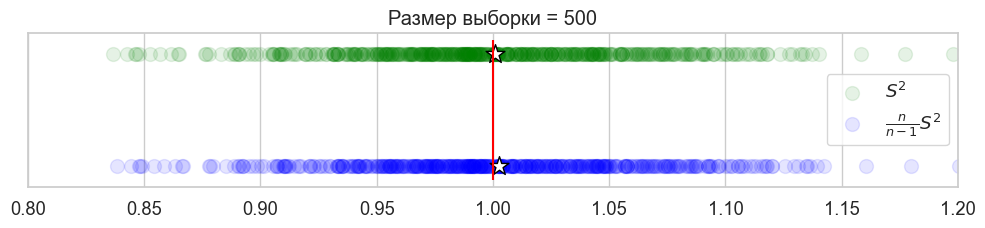

In [75]:
n = [10, 100, 500]
for i in range(3):
    draw(i, n[i])

**2.** Изучим поведение среднего оценок из первого пункта при росте размера выборки. Постройте график зависимости $\widetilde{\theta}$ от $n$ для двух типов оценок. Для вычисления зависимости нужно один раз сгенерировать выборки из пункта 1 достаточно большого размера (не более 500) и посчитать оценки по подвыборкам, используя <a href="https://miptstats.github.io/courses/python/05_numpy.html#2.1-Математические-операции">функции</a> из `numpy`. Использовать циклы, а так же функции, разворачивающиеся в цикл (например, `np.vectorize`), запрещено. 

**Решение:**

In [66]:
n = 500
data = np.random.normal(0, 1, size=(n, n))
data2 = data**2
data_c = np.cumsum(data, axis=1)
data2_c = np.cumsum(data2, axis = 1)
data_c = data_c / (np.arange(n) + 1)
data2_c = data2_c / (np.arange(n) + 1)

Посчитаем смещенную оценку:

In [67]:
tmp1 = (data2_c - data_c**2)
theta1 = tmp1.mean(axis=0)

Посчитаем несмещенную оценку:

In [68]:
tmp2 = (data2_c - data_c**2) * (np.arange(n) + 1) / (np.arange(n))
theta2 = tmp2.mean(axis=0)

Построим теперь графики зависимости

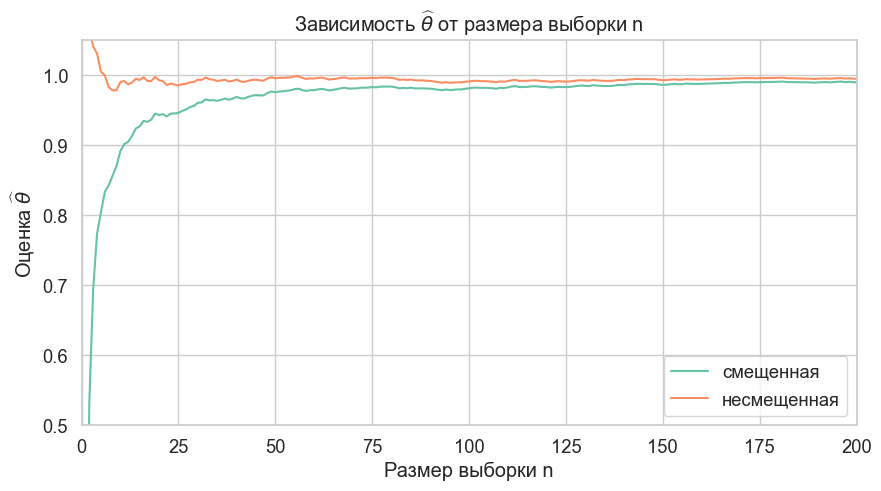

In [69]:
ax, fig = plt.subplots(figsize=(10,5))
plt.plot(np.arange(n) + 1, theta1)
plt.plot(np.arange(n) + 1, theta2)
plt.xlim((0, 200))
plt.ylim((0.5, 1.05))
plt.title(r'Зависимость $\widehat{\theta}$ от размера выборки n')
plt.ylabel(r'Оценка $\widehat{\theta}$')
plt.xlabel('Размер выборки n')
plt.legend(['смещенная', 'несмещенная'], loc="lower right", )
None

Сделайте вывод о том, что такое свойство несмещенности. Подтверждают ли сделанные эксперименты полученное в теоретических задачах свойство несмещенности (или отсутствие этого свойства) данных оценок? Поясните, почему в лабораторных по физике при оценке погрешности иногда используют $n-1$ в знаменателе, а не $n$.

*Замечание.* Для ответа на вопрос достаточно понимания текущего материала, ничего из физики знать не требуется.

**Вывод:** 

Оценка $\widehat{\theta}$ называется несмещенной, если $\mathbb{E}(\widehat{\theta}) = \theta$. То есть несмещённая оценка — это оценка, математическое ожидание которой равно оцениваемому параметру.

Из первых трех графиков, видно, что несмещенная оценка значительно лучше, чем смещенная при $n = 10$, а при увеличении n разница чувствуется все слабее. Эти выводы подтверждает и последний график зависимости среднего значения оценки $\widehat{\theta}$ от размера выборки n: из графика видно, что при достаточно боьшом n оценки практически совпадают, но при малом n несмещенная оценка значительно лучше приближена к истинному значению. Это происходит потому, что у смещенной оценки есть коэффициент $\frac{n}{n - 1}$, который при маленьком n очень сильно влияет на результат, а при большом n эта дробь практически равна 1, поэтому результаты совпадают.

Поэтому, при оценке погрешности в лабораторных работах используют несмещенную оценку, потому что в лаюораторных работах обычно небольшое количество измерений, то есть размер выборки n - маленький, а как мы уже выяснили, при маленьких n несмещенную оценка сильно лучше.

*Замечание.* Проведенные эксперименты позволяют сделать вывод только о поведении среднего значения оценки, но ничего не говорят о том, насколько велик их разброс относительно среднего.